<h1 align="center" style="background-color:DodgerBlue;">Desafío - Regresión desde la econometría </h1> 

>
### Descripción
>En la empresa en la cual te encuentras contratado, te solicitan trabajar con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit abarca las siguientes variables:
>
>● Income: Ingreso anual disponible en miles de dólares.
>
>● Limit: Límite del crédito.
>
>● Rating: Ranking del crédito.
>
>● Cards: Cantidad de tarjetas de crédito.
>
>● Age: Edad del usuario.
>
>● Education: Años de educación del usuario.
>
>● Gender: ¿Hombre o mujer?
>
>● Student: ¿Es estudiante?
>
>● Married: ¿Está casado?
>
>● Ethnicity: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
>
>● Balance: Promedio de deuda en tarjeta de crédito de usuario.
>
>El objetivo que persigue el trabajo con esta base de datos es conocer los determinantes de la variación en el promedio de deuda en tarjeta de crédito. Para ello se te solicita generar modelos econométricos para inspeccionar los efectos de distintos atributos a partir de requerimientos que serán detallados más adelante.
>
### Requerimientos
>
>1. Preparar el ambiente de trabajo (1 puntos). Para ello debes:
>
>● Importe las librerías básicas para el análisis de datos.
>
>● Incluya los import base de statsmodels.
>
>● Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.
>
>● Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para African American, Caucasian y Asian.
>
>Tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.
>
>2. Generar gráficos descriptivos para las variables continuas (1 puntos):
>
>● Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agregue una leyenda para indicar qué representa cada línea.
>
>● ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?
>
>3. Regresión Lineal Simple (2 puntos). Para ello se debe:
>
>● Generar una serie de modelos simples:
>
>![](fotos/reg_form5.jpg)
>
>● Utilizando statsmodels, comente brevemente los siguientes puntos:
>
>○ ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?
>
>○ ¿Qué podemos decir sobre el comportamiento de Student?
>
>■ ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?
>
>4. Generar un modelo que incluya todos los regresores (2 puntos): A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores y comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.
>
>![](fotos/reg_form6.jpg)
>
>5. Depurar el modelo e incluya sólo los predictores significativo (2 puntos)
>
>● En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia 𝑝 − 𝑣𝑎𝑙𝑢𝑒 ≤. 025. Comente brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales características de los predictores.
>
>● ¿Mejoró o empeoró el modelo con la reducción de regresores?
>
>6. Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes. (2 puntos)

In [150]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [151]:
# 1. Preparar el ambiente de trabajo (1 puntos).
df = pd.read_csv('datasets/Credit.csv').drop('Unnamed: 0', axis = 1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [152]:
#● Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable.
# Para el caso de Ethnicity, genere binarias para African American, Caucasian y Asian.

ethnicity_code = pd.DataFrame(pd.get_dummies(df.Ethnicity))
pd.concat([df, ethnicity_code], axis = 1)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,0,1
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1


In [153]:
# separemos todas las variables que son categóricas
categorical_columns = ['Ethnicity', 'Gender', 'Student', 'Married']

In [154]:
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
# imprimimos el nombre
    print('\n',cat)
# solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
# solicitamos el porcentaje de la frecuencia relativa
print((df[cat].value_counts()/len(df[cat])))


 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

 Gender
Female    207
 Male     193
Name: Gender, dtype: int64

 Student
No     360
Yes     40
Name: Student, dtype: int64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64


In [155]:
# Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

df['Ethnicity'].value_counts('%')

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [156]:

df['Gender'].value_counts('%')

Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

In [157]:

df['Student'].value_counts('%')

No     0.9
Yes    0.1
Name: Student, dtype: float64

In [158]:
df['Married'].value_counts('%')

Yes    0.6125
No     0.3875
Name: Married, dtype: float64

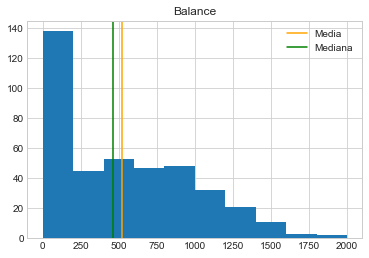

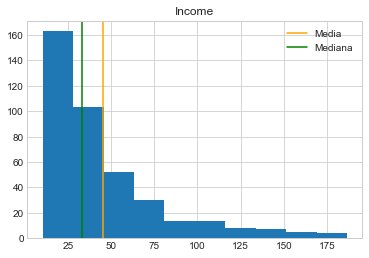

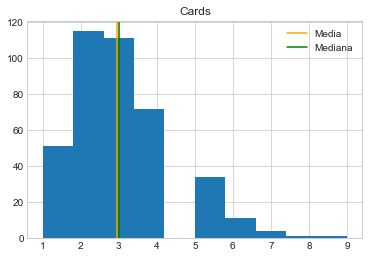

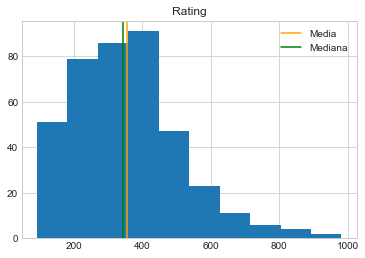

In [159]:
# 2. Generar gráficos descriptivos para las variables continuas (1 puntos):

def plot_hist (df, var):
    df[var].hist()
    
    plt.axvline(df[var].mean(), label = 'Media', color = 'orange')
    plt.axvline(np.median(df[var]), label = 'Mediana', color = 'green')
    
    plt.legend()
    plt.title(var)
    plt.show()
                
list_var = ['Balance', 'Income', 'Cards', 'Rating']

for i in list_var:
    plot_hist(df, i) 

In [160]:
# 3. Regresión Lineal Simple (2 puntos). Para ello se debe:

model_student = smf.ols('Balance ~ Student', df).fit()
model_income = smf.ols('Balance ~ Income', df).fit()
model_rating = smf.ols('Balance ~ Rating', df).fit()

model_student_balance = smf.ols('Balance ~ Income + Rating', df).fit()

In [161]:
model_student_balance.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1391.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          4.52e-180
Time:                        21:05:43   Log-Likelihood:                -2603.3
No. Observations:                 400   AIC:                             5213.
Df Residuals:                     397   BIC:                             5225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -534.8122     21.603    -24.757      0.000    -577.282    -492.342
Income        -7.6721      0.378    -20.272      0.000      -8.416      -6.928
Rating         3.9493      0.086     45.810      0.000       3.780       4.119
==============================================================================
Omnibus:                       91.478   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.964
Skew:                           1.320   Prob(JB):                     1.84e-35
Kurtosis:                       4.621   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [163]:
# 4. Generar un modelo que incluya todos los regresores (2 puntos):

model_sub = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', df).fit()

In [164]:
model_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          1.11e-253
Time:                        21:05:43   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
# 5. Depurar el modelo e incluya sólo los predictores significativo (2 puntos)

model_complete = smf.ols("Balance ~ Income + Limit  + Cards + Student ", df).fit()
model_complete.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2029.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          8.94e-262
Time:                        21:05:43   Log-Likelihood:                -2405.4
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     395   BIC:                             4841.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -499.7272     15.890    -31.449      0.000    -530.967    -468.488
Student[T.Yes]   429.6064     16.611     25.862      0.000     396.949     462.264
Income            -7.8392      0.232    -33.780      0.000      -8.295      -7.383
Limit              0.2666      0.004     75.271      0.000       0.260       0.274
Cards             23.1754      3.639      6.368      0.000      16.021      30.330
==============================================================================
Omnibus:                       34.751   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.363
Skew:                           0.771   Prob(JB):                     1.04e-09
Kurtosis:                       3.319   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
# 6. Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes. (2 puntos)

graph_var =['Income', 'Limit', 'Cards']

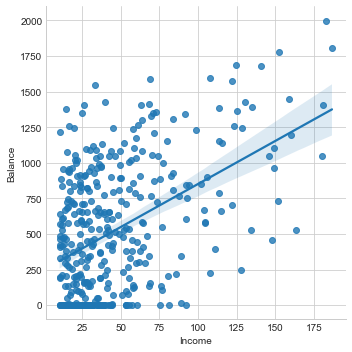

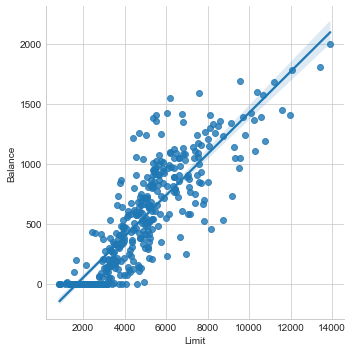

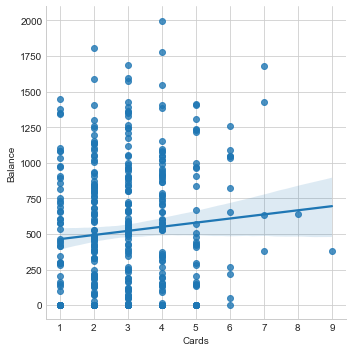

In [167]:
for i in graph_var :
    sns.lmplot(x = i, y = "Balance", data = df)